# Week 3 Data Exploration

### Load packages

In [1]:
#Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly as py
import datetime as dt
import scipy as scp
from scipy import stats
from scipy.stats import ttest_ind

#for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

import warnings
warnings.filterwarnings('ignore')

#### Additional Data Wrangling

In [2]:
### Import cleaned data without original STATUS column

merged4A = pd.read_csv('../Data/merged4AnalysisSTRICT.csv')

In [3]:
merged4A.head(25)

,Unnamed: 0,ID,gender,ownsCar,ownsRealty,numChildren,totalIncome,incomeType,eduLvl,famStatus,housingType,occupation,famSize,ageYrs,yrsEmpl,UNEMPLOYED,ApprStatus
0,0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,Not identified,2.0,33.0,12.435574,1,1
1,1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,Not identified,2.0,33.0,12.435574,1,1
2,2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,Not identified,2.0,33.0,12.435574,1,1
3,3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,Not identified,2.0,33.0,12.435574,1,1
4,4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,Not identified,2.0,33.0,12.435574,1,1
5,5,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,Not identified,2.0,33.0,12.435574,1,1
6,6,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,Not identified,2.0,33.0,12.435574,1,1
7,7,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,Not identified,2.0,33.0,12.435574,1,1
8,8,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,Not identified,2.0,33.0,12.435574,1,1
9,9,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,Not identified,2.0,33.0,12.435574,1,1


In [4]:
# drop duplicates to show one record per applicant for analysis
merged4B = merged4A.drop_duplicates(subset=merged4A.columns[1:], keep='first')

In [6]:
# sort dataFrame by ID so that each unique applicants' info appears together (check no dupes)
merged4C= merged4B.sort_values('ID')

In [7]:
merged4C.head()

,Unnamed: 0,ID,gender,ownsCar,ownsRealty,numChildren,totalIncome,incomeType,eduLvl,famStatus,housingType,occupation,famSize,ageYrs,yrsEmpl,UNEMPLOYED,ApprStatus
0,0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,Not identified,2.0,33.0,12.435574,1,1
16,16,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,Not identified,2.0,33.0,12.435574,1,1
31,31,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,Security staff,2.0,59.0,3.104787,1,1
61,61,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1.0,53.0,8.353354,1,1
66,66,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1.0,53.0,8.353354,1,1


In [8]:
# Drop Unnamed:0 col
merged4C.drop('Unnamed: 0', axis=1, inplace=True) 

In [12]:
# Drop ID column then remove duplicates because we know that one client can have more than one ID (from Kaggle Discussion thread)

merged4C.drop('ID', axis=1, inplace=True)

In [13]:
mergedOneRecord = merged4C.drop_duplicates(subset=merged4C.columns[1:], keep='first')

In [18]:
mergedOneRecord.head()

,gender,ownsCar,ownsRealty,numChildren,totalIncome,incomeType,eduLvl,famStatus,housingType,occupation,famSize,ageYrs,yrsEmpl,UNEMPLOYED,ApprStatus
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,Not identified,2.0,33.0,12.435574,1,1
31,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,Security staff,2.0,59.0,3.104787,1,1
61,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1.0,53.0,8.353354,1,1
137,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,Not identified,1.0,62.0,0.000000,0,0
188,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,Accountants,2.0,47.0,2.105450,1,0


In [15]:
mergedOneRecord.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13311 entries, 0 to 171489
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       13311 non-null  object 
 1   ownsCar      13311 non-null  object 
 2   ownsRealty   13311 non-null  object 
 3   numChildren  13311 non-null  int64  
 4   totalIncome  13311 non-null  float64
 5   incomeType   13311 non-null  object 
 6   eduLvl       13311 non-null  object 
 7   famStatus    13311 non-null  object 
 8   housingType  13311 non-null  object 
 9   occupation   13311 non-null  object 
 10  famSize      13311 non-null  float64
 11  ageYrs       13311 non-null  float64
 12  yrsEmpl      13311 non-null  float64
 13  UNEMPLOYED   13311 non-null  int64  
 14  ApprStatus   13311 non-null  int64  
dtypes: float64(4), int64(3), object(8)
memory usage: 1.6+ MB


In [16]:
mergedOneRecord.describe()

,numChildren,totalIncome,famSize,ageYrs,yrsEmpl,UNEMPLOYED,ApprStatus
count,13311.000000,1.331100e+04,13311.000000,13311.000000,13311.000000,13311.000000,13311.000000
mean,0.436556,1.841502e+05,2.197506,43.752911,5.927088,0.851176,0.518218
std,0.764648,1.009030e+05,0.934832,11.398216,6.404053,0.355929,0.499687
min,0.000000,2.700000e+04,1.000000,21.000000,0.000000,0.000000,0.000000
25%,0.000000,1.170000e+05,2.000000,34.000000,1.175931,1.000000,0.000000
50%,0.000000,1.575000e+05,2.000000,43.000000,4.087695,1.000000,1.000000
75%,1.000000,2.250000e+05,3.000000,53.000000,8.460133,1.000000,1.000000
max,19.000000,1.575000e+06,20.000000,69.000000,43.020733,1.000000,1.000000


# Determined that there are 13,311 unique clients in our dataset.

In [14]:
# save dataset where ID col removed then dupes removed to represent ONE record per client
mergedOneRecord.to_csv("../Data/mergedOneRecord.csv")

<AxesSubplot:>

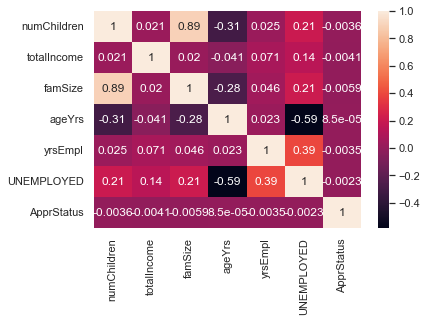

In [17]:
# Correlation matrix
sns.heatmap(mergedOneRecord.corr(), annot=True)

# family size and number of children are highly correlated, but the rest of the variables do not have significant correlation to eachother. Drop numChildren before doing any ML.

## Explore continuous variables

Text(0.5, 1.0, 'Applicant Income Distribution')

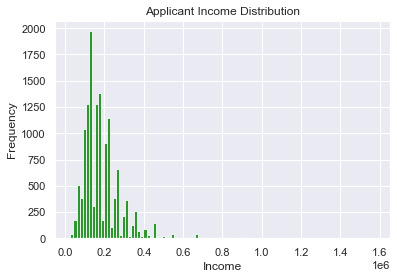

In [19]:
num_bins = 100
n, bins, patches = plt.hist(mergedOneRecord['totalIncome'], num_bins, facecolor='green', alpha = .8)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Applicant Income Distribution')

### There is a slight positive skew in income.  There must be some outliers.

In [20]:
mergedOneRecord.describe()

,numChildren,totalIncome,famSize,ageYrs,yrsEmpl,UNEMPLOYED,ApprStatus
count,13311.000000,1.331100e+04,13311.000000,13311.000000,13311.000000,13311.000000,13311.000000
mean,0.436556,1.841502e+05,2.197506,43.752911,5.927088,0.851176,0.518218
std,0.764648,1.009030e+05,0.934832,11.398216,6.404053,0.355929,0.499687
min,0.000000,2.700000e+04,1.000000,21.000000,0.000000,0.000000,0.000000
25%,0.000000,1.170000e+05,2.000000,34.000000,1.175931,1.000000,0.000000
50%,0.000000,1.575000e+05,2.000000,43.000000,4.087695,1.000000,1.000000
75%,1.000000,2.250000e+05,3.000000,53.000000,8.460133,1.000000,1.000000
max,19.000000,1.575000e+06,20.000000,69.000000,43.020733,1.000000,1.000000


In [21]:
# print income range represented in this data set
minInc = mergedOneRecord.totalIncome.min()
print("The lowest applicant income is" , minInc)

The lowest applicant income is 27000.0


In [22]:
maxInc = mergedOneRecord.totalIncome.max()
print("The maximum applicant income is" , maxInc)

The maximum applicant income is 1575000.0


<AxesSubplot:>

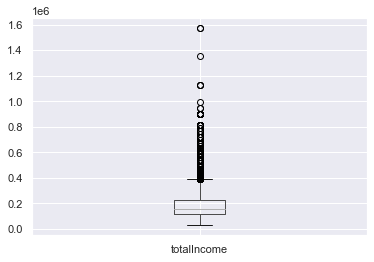

In [23]:
mergedOneRecord.boxplot('totalIncome')

<AxesSubplot:>

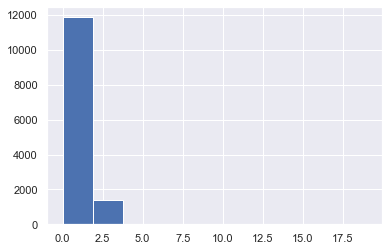

In [24]:
mergedOneRecord['numChildren'].hist()

<AxesSubplot:>

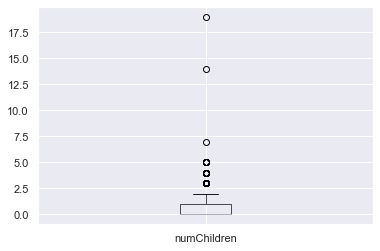

In [25]:
mergedOneRecord.boxplot('numChildren')

<AxesSubplot:>

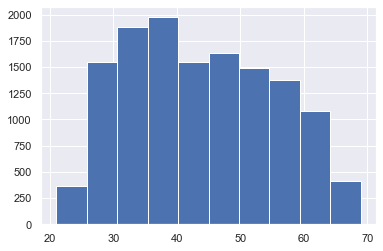

In [26]:
mergedOneRecord['ageYrs'].hist()

<AxesSubplot:>

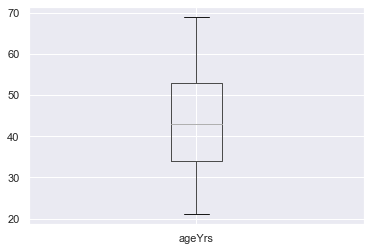

In [27]:
mergedOneRecord.boxplot('ageYrs')

<AxesSubplot:>

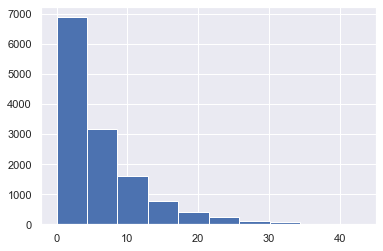

In [28]:
mergedOneRecord['yrsEmpl'].hist()

<AxesSubplot:>

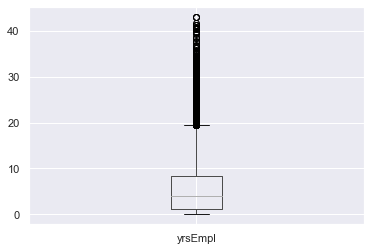

In [29]:
mergedOneRecord.boxplot('yrsEmpl')

<AxesSubplot:>

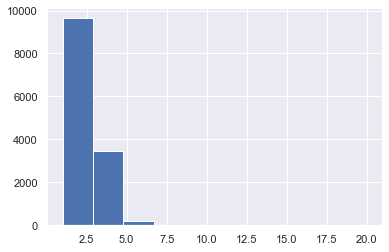

In [30]:
mergedOneRecord['famSize'].hist()

<AxesSubplot:>

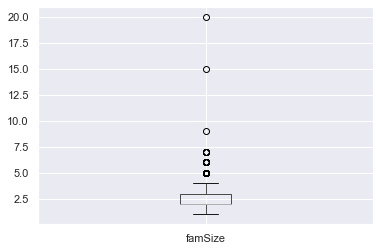

In [31]:
mergedOneRecord.boxplot('famSize')

## Categorical Variable Distributions

<AxesSubplot:>

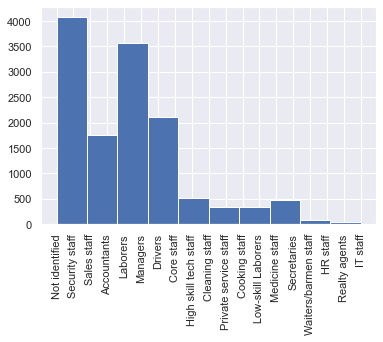

In [32]:
mergedOneRecord['occupation'].hist(xrot=90)

array([[<AxesSubplot:title={'center':'Accountants'}>,
        <AxesSubplot:title={'center':'Cleaning staff'}>,
        <AxesSubplot:title={'center':'Cooking staff'}>,
        <AxesSubplot:title={'center':'Core staff'}>],
       [<AxesSubplot:title={'center':'Drivers'}>,
        <AxesSubplot:title={'center':'HR staff'}>,
        <AxesSubplot:title={'center':'High skill tech staff'}>,
        <AxesSubplot:title={'center':'IT staff'}>],
       [<AxesSubplot:title={'center':'Laborers'}>,
        <AxesSubplot:title={'center':'Low-skill Laborers'}>,
        <AxesSubplot:title={'center':'Managers'}>,
        <AxesSubplot:title={'center':'Medicine staff'}>],
       [<AxesSubplot:title={'center':'Not identified'}>,
        <AxesSubplot:title={'center':'Private service staff'}>,
        <AxesSubplot:title={'center':'Realty agents'}>,
        <AxesSubplot:title={'center':'Sales staff'}>],
       [<AxesSubplot:title={'center':'Secretaries'}>,
        <AxesSubplot:title={'center':'Security staff'}>

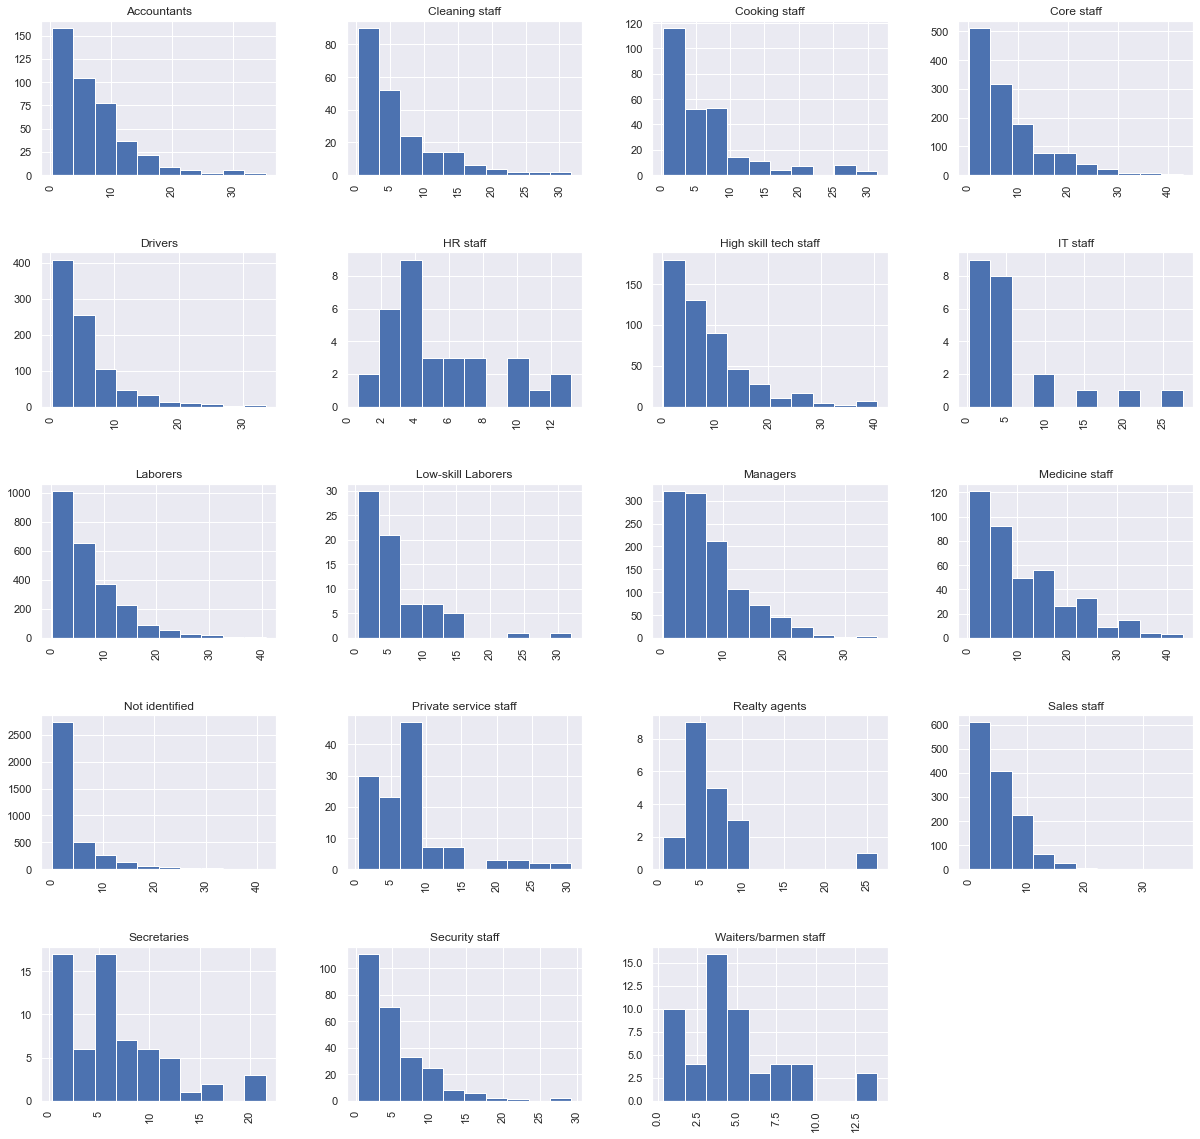

In [33]:
# yrs employed by occupation type
mergedOneRecord[['yrsEmpl','occupation']].hist(by='occupation', figsize=(20, 20))

array([[<AxesSubplot:title={'center':'Commercial associate'}>,
        <AxesSubplot:title={'center':'Pensioner'}>],
       [<AxesSubplot:title={'center':'State servant'}>,
        <AxesSubplot:title={'center':'Student'}>],
       [<AxesSubplot:title={'center':'Working'}>, <AxesSubplot:>]],
      dtype=object)

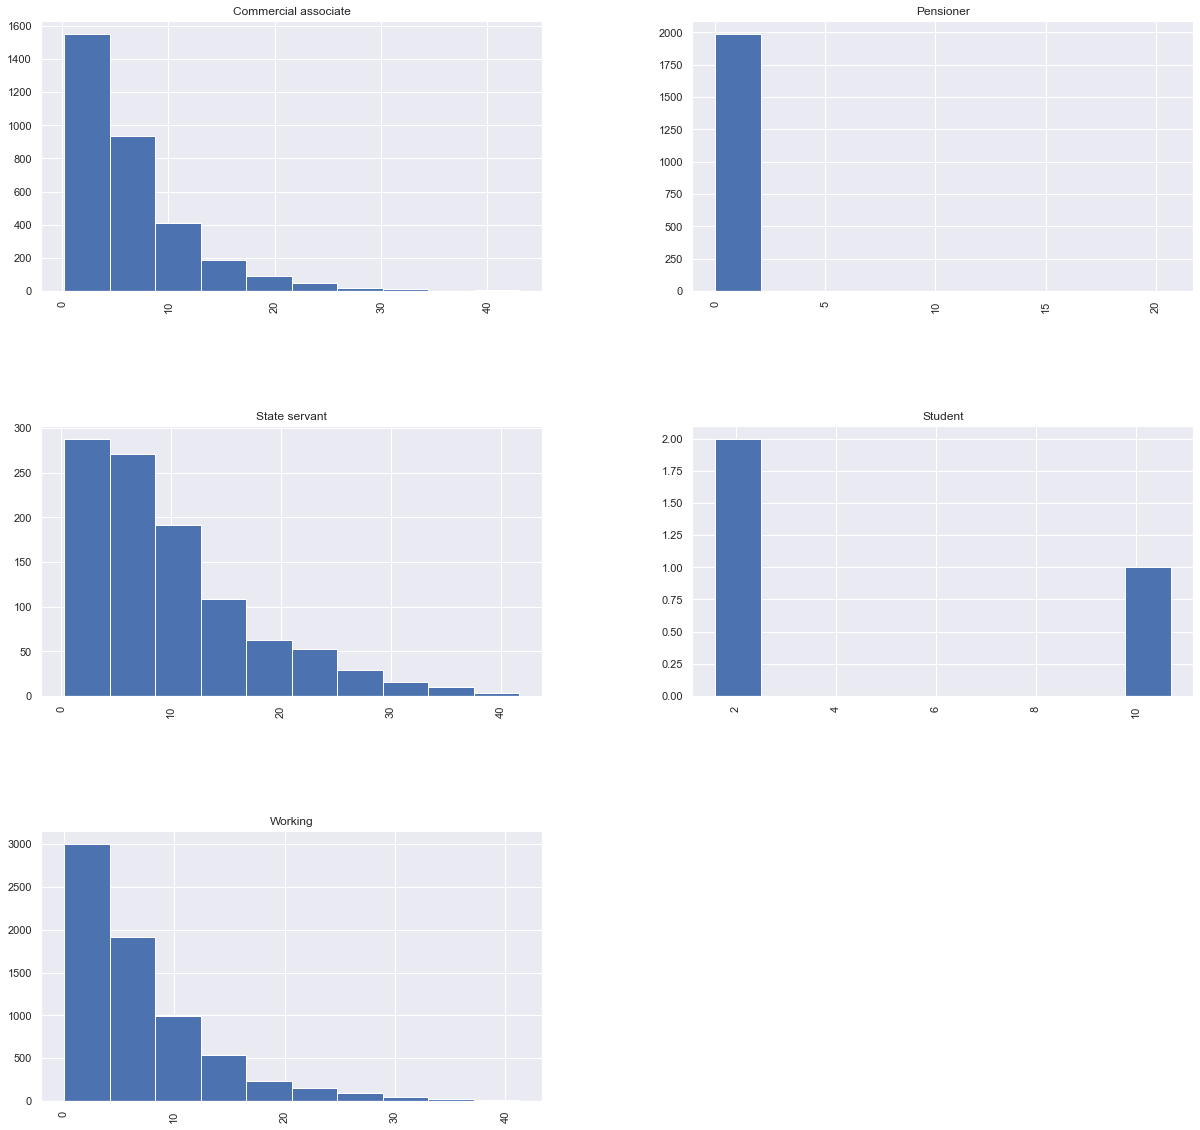

In [34]:
#incomeType by yrsEmpl
mergedOneRecord[['yrsEmpl','incomeType']].hist(by='incomeType', figsize=(20, 20))

## Most of the occupation types are "Not identified". May drop this column when doing ML since we can use "incomeType" instead, and there's no apparent occupation type to replace it with.

<AxesSubplot:>

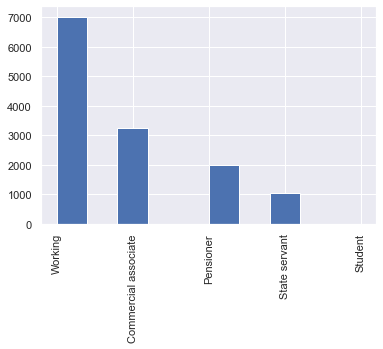

In [35]:
mergedOneRecord['incomeType'].hist(xrot=90)

<AxesSubplot:>

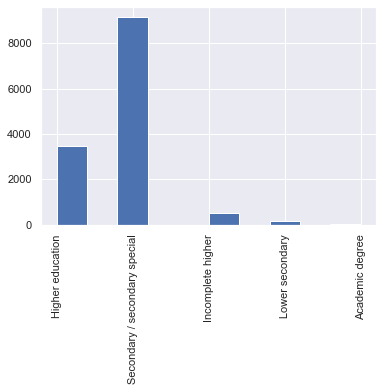

In [36]:
mergedOneRecord['eduLvl'].hist(xrot=90)

## Most applicants have a high school education, followed by those with a 4 year degree.

<AxesSubplot:>

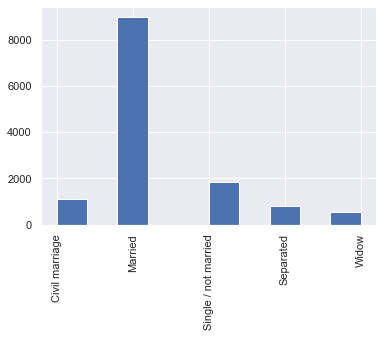

In [37]:
mergedOneRecord['famStatus'].hist(xrot=90)

## Explore Binary Categorical Variables

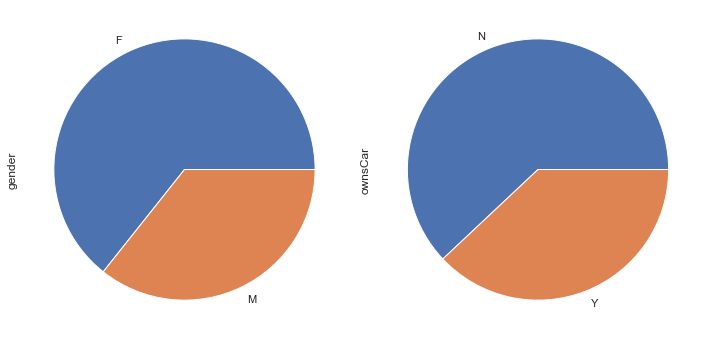

In [38]:
# gender, ownsCar dist
fig, axes = plt.subplots(1,2)
g1 = mergedOneRecord.groupby('gender')['gender'].count().plot(kind='pie', y='gender', ax=axes[0])
g2 = mergedOneRecord.groupby('ownsCar')['ownsCar'].count().plot(kind='pie', y='ownsCar', ax=axes[1])

fig.set_size_inches(10,5)

plt.tight_layout()

array([<AxesSubplot:title={'center':'F'}>,
       <AxesSubplot:title={'center':'M'}>], dtype=object)

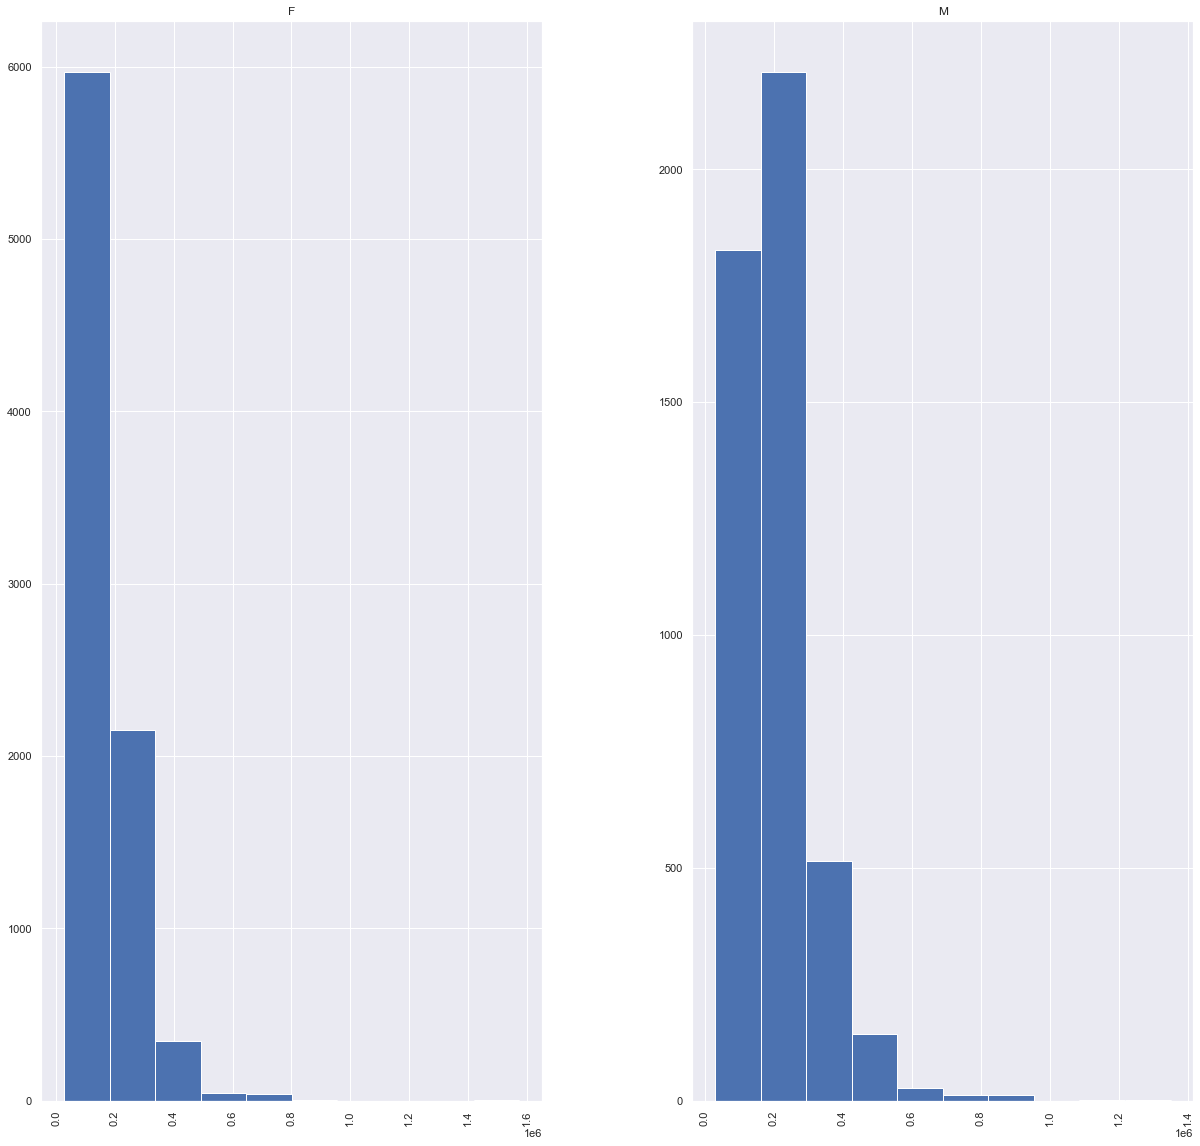

In [39]:
# gender by totalIncome
mergedOneRecord[['totalIncome','gender']].hist(by='gender', figsize=(20, 20))

# need to balance the M/F variable. Undersample on the F so that there is no bias towards F in models

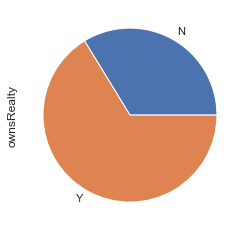

In [40]:
# ownsRealty 

g3 = mergedOneRecord.groupby('ownsRealty')['ownsRealty'].count().plot(kind='pie', y='ownsRealty')

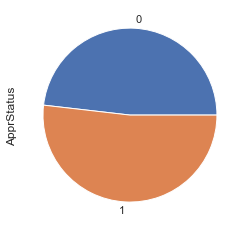

In [41]:
g4 = mergedOneRecord.groupby('ApprStatus')['ApprStatus'].count().plot(kind='pie', y='ApprovalStatus')

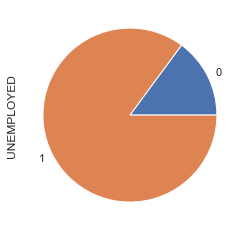

In [42]:
g5 = mergedOneRecord.groupby('UNEMPLOYED')['UNEMPLOYED'].count().plot(kind='pie', y='UNEMPLOYED')

In [43]:
mergedOneRecord.ApprStatus.value_counts()

1    6898
0    6413
Name: ApprStatus, dtype: int64

## Our benchmark to compare our ML model to is that 51.8% of applicants in this dataset would be approved for a credit card, and 48.2% would be considered too risky, and thus rejected.

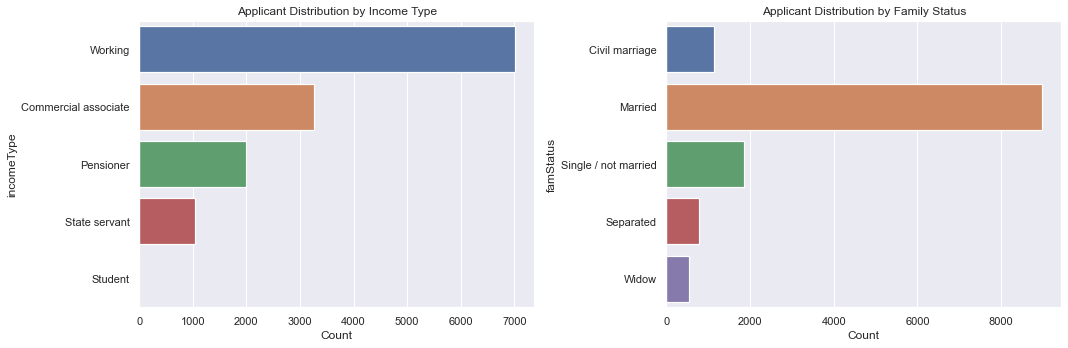

In [44]:
# Income type, family status distributions

fig, axes = plt.subplots(1,2)

incTDist=sns.countplot(y=mergedOneRecord.incomeType,linewidth=1.2, ax=axes[0])
incTDist.set_title("Applicant Distribution by Income Type")
incTDist.set_xlabel("Count")

famDist=sns.countplot(y=mergedOneRecord.famStatus,linewidth=1.2, ax=axes[1])
famDist.set_title("Applicant Distribution by Family Status")
famDist.set_xlabel("Count")

fig.set_size_inches(15,5)

plt.tight_layout()

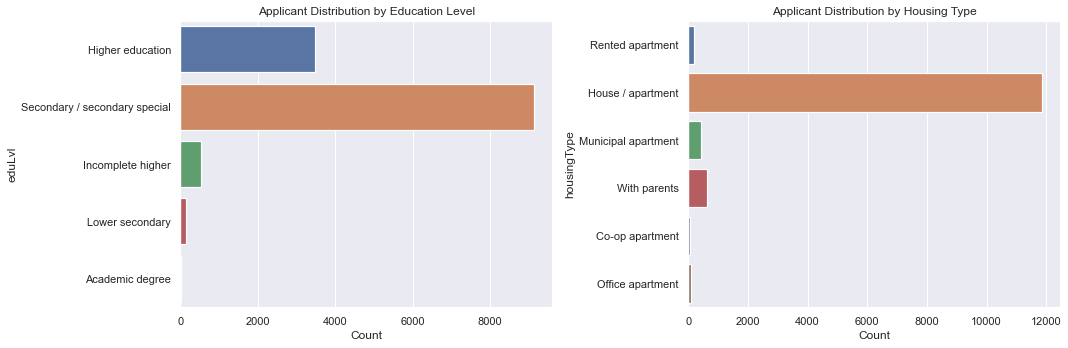

In [45]:
# education type, housing type

fig, axes = plt.subplots(1,2)

eduTDist=sns.countplot(y=mergedOneRecord.eduLvl,linewidth=1.2, ax=axes[0])
eduTDist.set_title("Applicant Distribution by Education Level")
eduTDist.set_xlabel("Count")

houDist=sns.countplot(y=mergedOneRecord.housingType,linewidth=1.2, ax=axes[1])
houDist.set_title("Applicant Distribution by Housing Type")
houDist.set_xlabel("Count")

fig.set_size_inches(15,5)

plt.tight_layout()

In [46]:
recordsExplore = pd.read_csv('../Data/credit_record.csv')

In [47]:
recordsExplore.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [48]:
# show the frequency of each Status type for every ID
recordsEx2 = pd.DataFrame(recordsExplore.groupby(["ID", "STATUS"])["STATUS"].count()).rename(columns={'STATUS': 'Freq'}).reset_index()
recordsEx2

,ID,STATUS,Freq
0,5001711,0,3
1,5001711,X,1
2,5001712,0,10
3,5001712,C,9
4,5001713,X,22
...,...,...,...
94138,5150483,X,18
94139,5150484,0,12
94140,5150484,C,1
94141,5150485,0,2


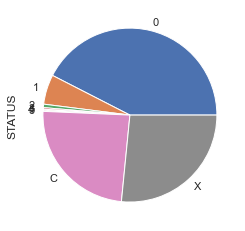

In [49]:
# plot status types
g8 = recordsEx2.groupby('STATUS')['STATUS'].count().plot(kind='pie', y='STATUS')


#### Confirmed: The majority of the applicants are paid up to date, have a 0 balance, or are overdue on payment by 1-29 days.

# Recode String Variables

In [50]:
# recode, drop original string columns, and ensure int data type
def genderRecode (series):
    if series == "F":
        return 0
    if series == "M":
        return 1
mergedOneRecord['genderR'] = mergedOneRecord['gender'].apply(genderRecode)
mergedOneRecord.drop('gender', axis=1, inplace=True)

In [52]:
mergedOneRecord.genderR = mergedOneRecord.genderR.astype(int)

In [53]:
mergedOneRecord.head()

,ownsCar,ownsRealty,numChildren,totalIncome,incomeType,eduLvl,famStatus,housingType,occupation,famSize,ageYrs,yrsEmpl,UNEMPLOYED,ApprStatus,genderR
0,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,Not identified,2.0,33.0,12.435574,1,1,1
31,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,Security staff,2.0,59.0,3.104787,1,1,1
61,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1.0,53.0,8.353354,1,1,0
137,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,Not identified,1.0,62.0,0.000000,0,0,0
188,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,Accountants,2.0,47.0,2.105450,1,0,1


In [54]:
def carRecode (series):
    if series == "N":
        return 0
    if series == "Y":
        return 1
mergedOneRecord['ownsCarR'] = mergedOneRecord['ownsCar'].apply(carRecode)
mergedOneRecord.drop('ownsCar', axis=1, inplace=True)

In [55]:
mergedOneRecord.ownsCarR = mergedOneRecord.ownsCarR.astype(int)

In [56]:
def realtyRecode (series):
    if series == "N":
        return 0
    if series == "Y":
        return 1
mergedOneRecord['ownsRealtyR'] = mergedOneRecord['ownsRealty'].apply(realtyRecode)
mergedOneRecord.drop('ownsRealty', axis=1, inplace=True)

In [57]:
mergedOneRecord.ownsRealtyR = mergedOneRecord.ownsRealtyR.astype(int)

In [58]:
mergedOneRecord['occupation'].unique()

array(['Not identified', 'Security staff', 'Sales staff', 'Accountants',
       'Laborers', 'Managers', 'Drivers', 'Core staff',
       'High skill tech staff', 'Cleaning staff', 'Private service staff',
       'Cooking staff', 'Low-skill Laborers', 'Medicine staff',
       'Secretaries', 'Waiters/barmen staff', 'HR staff', 'Realty agents',
       'IT staff'], dtype=object)

In [60]:
# Decided to drop since most occupation types are Not Identified/missing
mergedOneRecord.drop('occupation', axis=1, inplace=True) 

In [61]:
# Drop numChildren column since it correlates highly with famSize
mergedOneRecord.drop('numChildren', axis=1, inplace=True) 

In [62]:
mergedOneRecord['eduLvl'].unique()

array(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [63]:
def eduR (series):
    if series == "Higher education":
        return 0
    if series == "Secondary / secondary special":
        return 1
    if series == "Incomplete higher":
        return 2
    if series == "Lower secondary":
        return 3
    if series == "Academic degree":
        return 4
    
mergedOneRecord['eduLvlR'] = mergedOneRecord['eduLvl'].apply(eduR)
mergedOneRecord.drop('eduLvl', axis=1, inplace=True)

In [64]:
mergedOneRecord.eduLvlR = mergedOneRecord.eduLvlR.astype(int)

In [65]:
mergedOneRecord['incomeType'].unique()

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'], dtype=object)

In [66]:
def incR (series):
    if series == "Working":
        return 0
    if series == "Commercial associate":
        return 1
    if series == "Pensioner":
        return 2
    if series == "State servant":
        return 3
    if series == "Student":
        return 4
    
mergedOneRecord['incomeTypeR'] = mergedOneRecord['incomeType'].apply(incR)
mergedOneRecord.drop('incomeType', axis=1, inplace=True)

In [67]:
mergedOneRecord.incomeTypeR = mergedOneRecord.incomeTypeR.astype(int)

In [68]:
mergedOneRecord['housingType'].unique()

array(['Rented apartment', 'House / apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [69]:
def housR (series):
    if series == "Rented apartment":
        return 0
    if series == "House / apartment":
        return 1
    if series == "Municipal apartment":
        return 2
    if series == "With parents":
        return 3
    if series == "Co-op apartment":
        return 4
    if series == "Office apartment":
        return 5
    
mergedOneRecord['housingTypeR'] = mergedOneRecord['housingType'].apply(housR)
mergedOneRecord.drop('housingType', axis=1, inplace=True)

In [70]:
mergedOneRecord.housingTypeR = mergedOneRecord.housingTypeR.astype(int)

In [71]:
mergedOneRecord['famStatus'].unique()

array(['Civil marriage', 'Married', 'Single / not married', 'Separated',
       'Widow'], dtype=object)

In [72]:
def famR (series):
    if series == "Civil marriage":
        return 0
    if series == "Married":
        return 1
    if series == "Single / not married":
        return 2
    if series == "Separated":
        return 3
    if series == "Widow":
        return 4
    
mergedOneRecord['famStatusR'] = mergedOneRecord['famStatus'].apply(famR)
mergedOneRecord.drop('famStatus', axis=1, inplace=True)

In [73]:
mergedOneRecord.famStatusR = mergedOneRecord.famStatusR.astype(int)

In [75]:
mergedOneRecord.head()

,totalIncome,famSize,ageYrs,yrsEmpl,UNEMPLOYED,ApprStatus,genderR,ownsCarR,ownsRealtyR,eduLvlR,incomeTypeR,housingTypeR,famStatusR
0,427500.0,2.0,33.0,12.435574,1,1,1,1,1,0,0,0,0
31,112500.0,2.0,59.0,3.104787,1,1,1,1,1,1,0,1,1
61,270000.0,1.0,53.0,8.353354,1,1,0,0,1,1,1,1,2
137,283500.0,1.0,62.0,0.000000,0,0,0,0,1,0,2,1,3
188,270000.0,2.0,47.0,2.105450,1,0,1,1,1,0,0,1,1


In [76]:
# Check data types of recoded data frame
mergedOneRecord.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13311 entries, 0 to 171489
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   totalIncome   13311 non-null  float64
 1   famSize       13311 non-null  float64
 2   ageYrs        13311 non-null  float64
 3   yrsEmpl       13311 non-null  float64
 4   UNEMPLOYED    13311 non-null  int64  
 5   ApprStatus    13311 non-null  int64  
 6   genderR       13311 non-null  int32  
 7   ownsCarR      13311 non-null  int32  
 8   ownsRealtyR   13311 non-null  int32  
 9   eduLvlR       13311 non-null  int32  
 10  incomeTypeR   13311 non-null  int32  
 11  housingTypeR  13311 non-null  int32  
 12  famStatusR    13311 non-null  int32  
dtypes: float64(4), int32(7), int64(2)
memory usage: 1.1 MB


In [77]:
# save cleaned dummy code data frame to csv
mergedOneRecord.to_csv("../Data/cleanDummy.csv")